In [7]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [8]:
#Reading Input
marks=pd.read_csv('nas-pupil-marks.csv')
marks.head()

,STUID,State,District,Gender,Age,Category,Same language,Siblings,Handicap,Father edu,...,Express science views,Watch TV,Read magazine,Read a book,Play games,Help in household,Maths %,Reading %,Science %,Social %
0,11011001001,AP,1,1,3,3,1,5,2,1,...,3,3,4,3,4,4,20.37,NaN,27.78,NaN
1,11011001002,AP,1,2,3,4,2,5,2,2,...,3,4,4,3,4,4,12.96,NaN,38.18,NaN
2,11011001003,AP,1,2,3,4,2,5,2,1,...,3,4,3,3,4,4,27.78,70.00,NaN,NaN
3,11011001004,AP,1,2,3,3,2,4,2,1,...,3,4,3,3,4,4,NaN,56.67,NaN,36.00
4,11011001005,AP,1,2,3,3,2,5,2,1,...,3,2,3,3,4,4,NaN,NaN,14.55,8.33


In [9]:
south=["KL", "AP","TN","KA","PY","AN"]
rest=[stat for stat in marks.State.unique() if stat not in south]
south_marks=marks.loc[marks['State'].isin(south)].copy()
south_marks=south_marks[['State','Maths %','Science %']]

In [10]:
rest_marks=marks.loc[marks['State'].isin(rest)].copy()
rest_marks=rest_marks[['State','Maths %','Science %']]
rest_marks.describe()

,Maths %,Science %
count,71709.000000,70355.000000
mean,33.238555,37.030322
std,16.746998,15.231606
min,0.000000,0.000000
25%,22.030000,26.790000
50%,28.330000,33.930000
75%,40.000000,45.450000
max,100.000000,100.000000


,Maths %,Science %
Zone,,
Rest,33.238555,37.030322
South,28.845172,34.315665


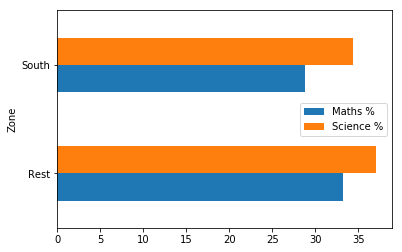

In [11]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
marks['Zone']=''
marks.loc[marks['State'].isin(south),'Zone']='South'
marks.loc[marks['State'].isin(rest),'Zone']='Rest'
marks[['Zone','Maths %','Science %']].groupby('Zone').mean()
marks[['Zone','Maths %','Science %']].groupby('Zone').mean().plot.barh()
plt.show()

# Hypothesis Testing
Null hypothesis- Performance of south is similar to rest of the nation. 

Alternate Hypothesis- Performance of south is not similar to rest of the nation

###### Significance Level- It will be very low as dataset is large enough - 10^-30
Outcome- P value less than significance level shows that Alternate Hypothesis is true and t- statistics value suggest that performance of rest of the nation was better in comparison to performance of southern states.

(array([ 371., 1605., 5043., 6082., 3884., 1867., 1054.,  485.,  176.,
          70.]),
 array([ 0.   ,  9.091, 18.182, 27.273, 36.364, 45.455, 54.546, 63.637,
        72.728, 81.819, 90.91 ]),
 <a list of 10 Patch objects>)

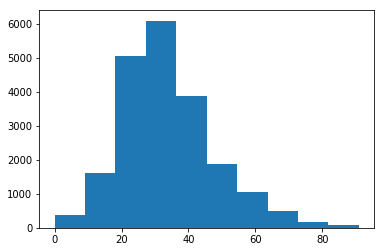

In [12]:
plt.hist(south_marks['Science %'].dropna(),bins=10)
plt.show()

Above plot shows that the marks are nearly normal and so t-test can be applied without any transformation.

In [13]:
# Comparison of Maths marks
rest_maths=rest_marks['Maths %'].dropna()
south_maths= south_marks['Maths %'].dropna()
ttest_ind(rest_maths,south_maths)

Ttest_indResult(statistic=35.01520167954514, pvalue=7.402089589388722e-267)

In [14]:
# Comparison of Science marks
rest_sci=rest_marks['Science %'].dropna()
south_sci= south_marks['Science %'].dropna()
ttest_ind(rest_sci,south_sci)

Ttest_indResult(statistic=23.072531399746254, pvalue=1.9037258785414566e-117)